In [67]:
from numpy import *
import matplotlib.pyplot as plt
import time

In [108]:
def compute_error_for_line_given_points(b, m, points):
    # initialize it at 0
    totalError = 0
    #for every point
    for i in range(0, len(points)):
        # get the x value
        x = points[i, 0]
        # get the y value
        y = points[i, 1]
        # get the difference, suare it, add it to the total
        totalError += ( y - (m * x + b) ) ** 2

    # get the average
    return totalError / float(len(points))


def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    # starting b and m
    b = starting_b
    m = starting_m

    # gradient descent
    for i in range(num_iterations):
        # update b and m with the new more accurate b and m
        # by performing this gradient step
        b, m = step_gradient(b, m, array(points), learning_rate)
        if i % 50 == 0:
            print("HELLO")
            plt.figure(22)
            plt.scatter(points[:,0], points[:,1])
            x = linspace(0, 68, 1000)
            y = m*x + b
            plt.plot(x, y, color='orange')
            plt.show()

    return [b, m]

    
def step_gradient(b_current, m_current, points, learning_rate):
    # starting points for our gradients
    b_gradient = 0
    m_gradient = 0

    N = float(len(points))

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        # direction with respect to b and m
        # computing partial derivatives of our error function
        # частная производная по перменной показывает в какую сторону данная переменная возрастает
        b_gradient += - (2 / N) * (y - (m_current * x + b_current) )
        m_gradient += - (2 / N) * x * (y - (m_current * x + b_current) )

    # update our b and m values using our partial derivatives
    new_b = b_current - ( learning_rate * b_gradient )
    new_m = m_current - ( learning_rate * m_gradient )
    return [new_b, new_m]
    
    

def run():
    
    # Step 1 - collect our data
    points = genfromtxt('data.csv', delimiter=',', dtype=longdouble)

    # Step 2 - define our hyperparams
    # how fast should our model converge
    learning_rate = 0.0001
    # y = mx + b (slope formula)
    initial_b = 0
    initial_m = 0
    num_iterations = 1000
    plt.figure(1)
    plt.scatter(points[:,0], points[:,1])
    x = linspace(0, 68, 1000)
    y = initial_m*x + initial_b
    plt.plot(x, y, color='orange')
    plt.show()
    # Step 3 - train our model
    print("starting gradient descent at b = {}, m = {}, error = {}".format(
        initial_b, initial_m,
        compute_error_for_line_given_points(initial_b, initial_m, points))) # starting point
    
    
    # perform gradient descent (we will get optilmal slope & m)
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print('After {} iterations b = {}, m = {}, error = {}'.format(
        num_iterations, b, m,
        compute_error_for_line_given_points(b, m, points))) # starting point
 
    

$${2\over N}\sum_{i=1}^{N} -x_i (y_i - (m\cdot x_i + b))$$

$${2\over N}\sum_{i=1}^{N} -(y_i - (m\cdot x_i + b))$$

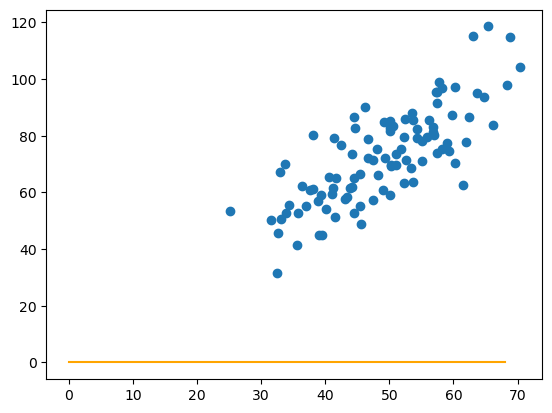

starting gradient descent at b = 0, m = 0, error = 5565.107834483214
HELLO


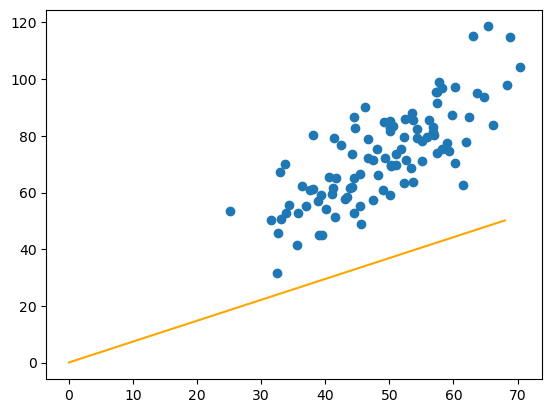

HELLO


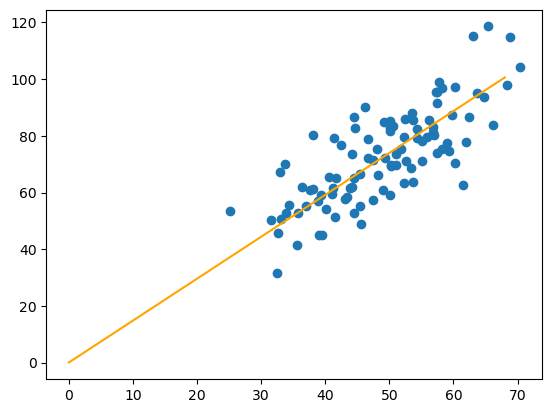

HELLO


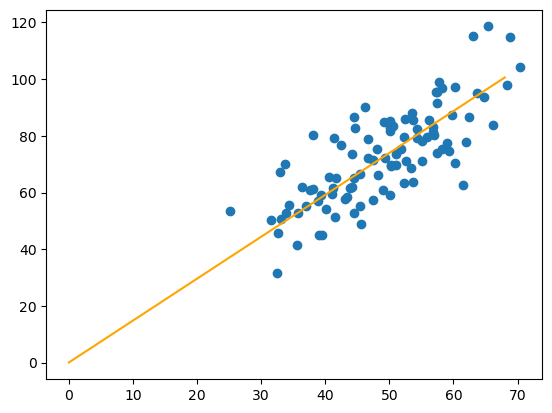

HELLO


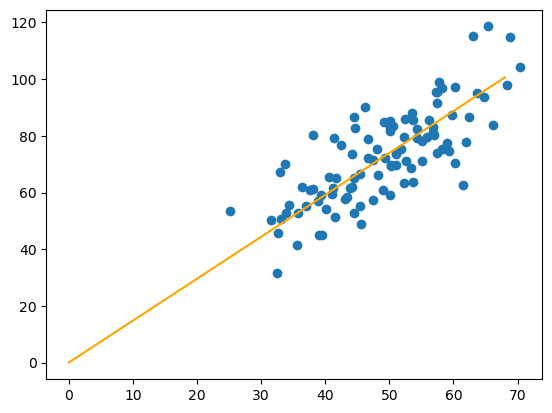

HELLO


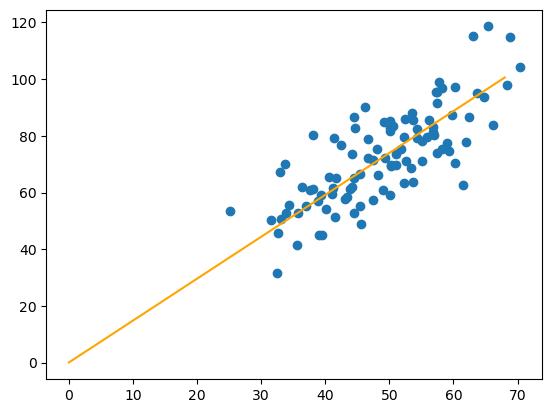

HELLO


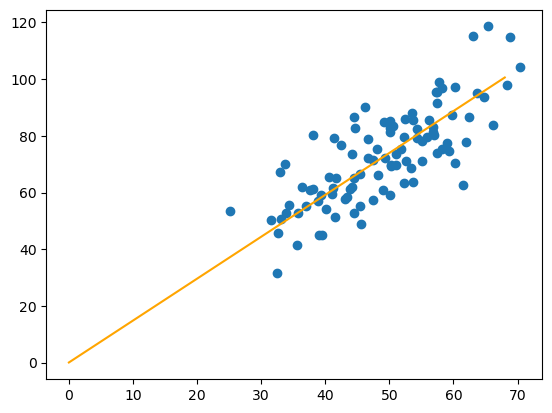

HELLO


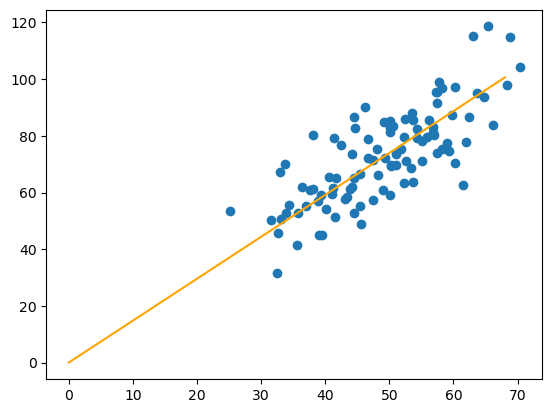

HELLO


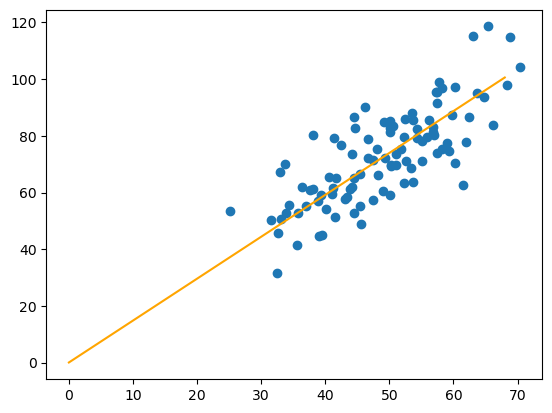

HELLO


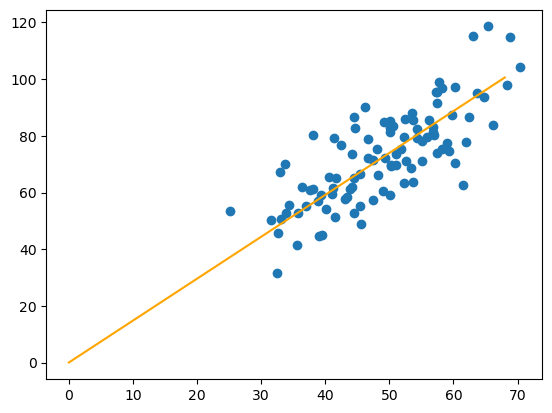

HELLO


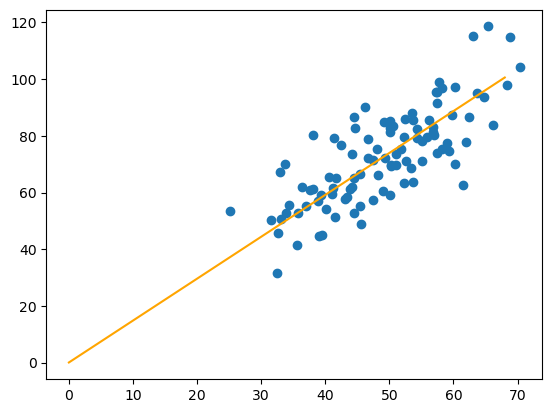

HELLO


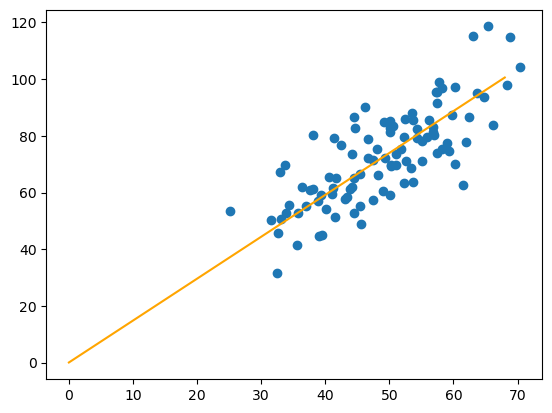

HELLO


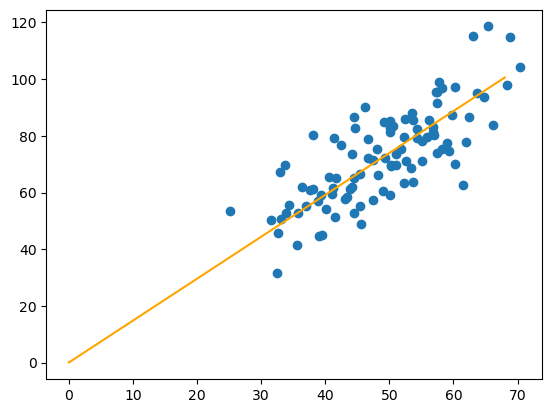

HELLO


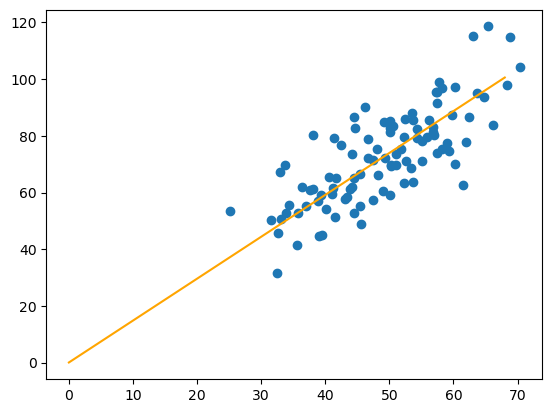

HELLO


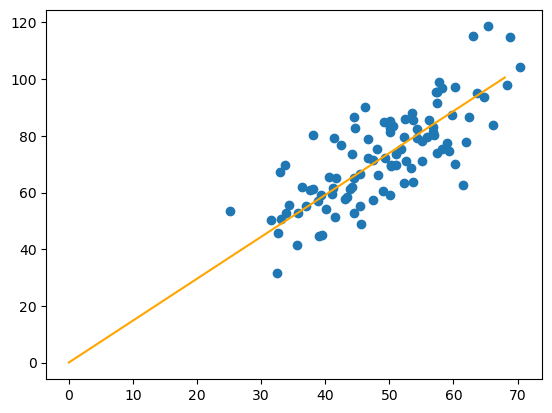

HELLO


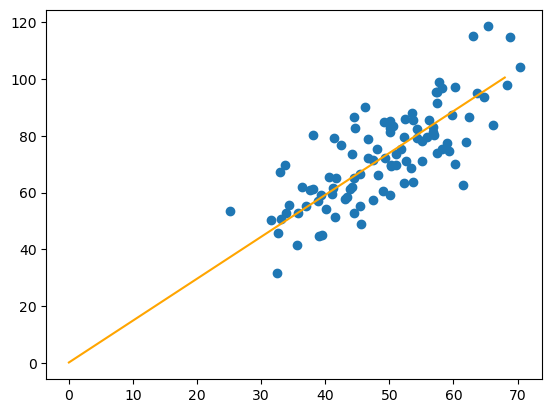

HELLO


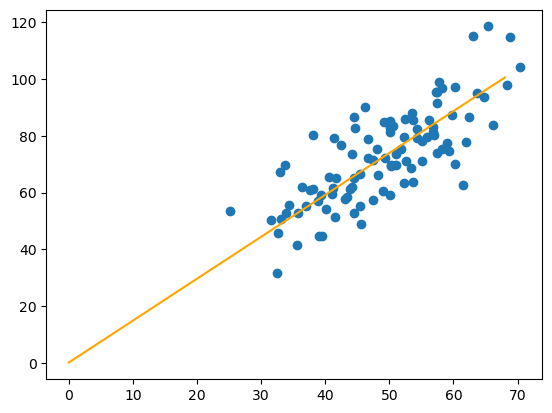

HELLO


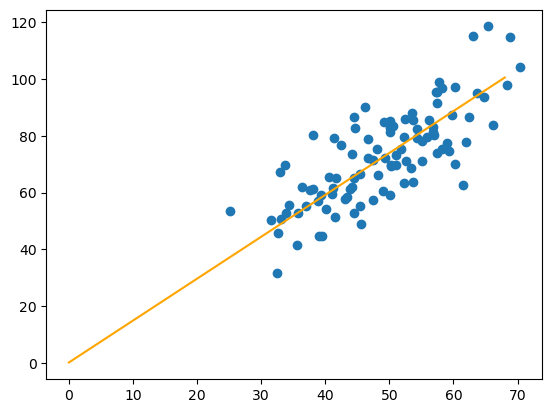

HELLO


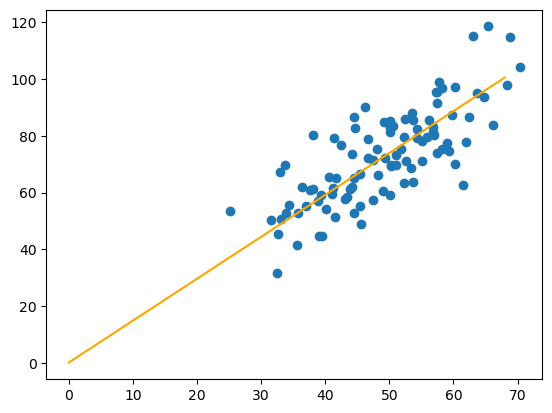

HELLO


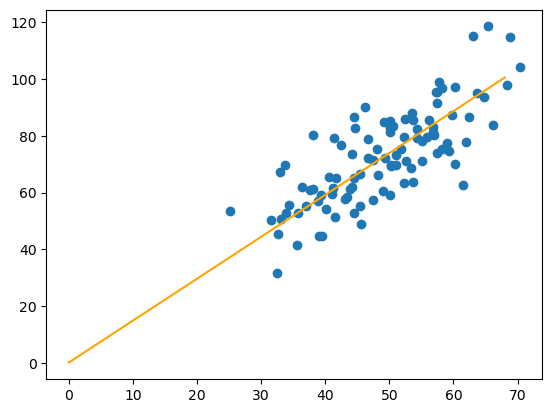

HELLO


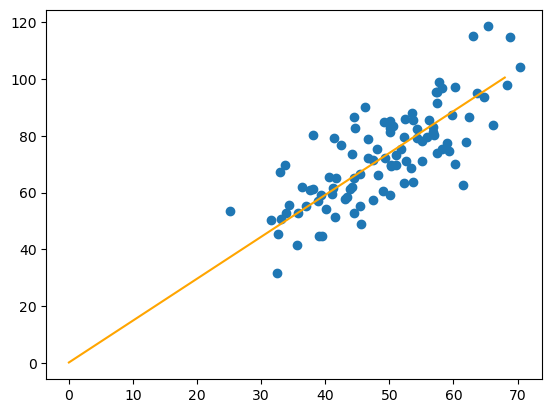

After 1000 iterations b = 0.08893651993741361, m = 1.477744085189445, error = 112.6148101161347


In [109]:
run()

